##### Imports

In [22]:
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

##### Utility functions

In [5]:
def countpop(grid):
    ''' Census the population of individuals: 0 -> embryo, 1 -> juvenile, 2 -> adult'''
    ''' Returns the 1x1x4 array with amount of individuals in each stage'''
    embryos = np.sum(grid['occupant'][:,:] == 1)
    juveniles = np.sum(grid['occupant'][:,:] == 2)
    adults = np.sum(grid['occupant'][:,:] == 3)
    total = juveniles + adults
    return [embryos, juveniles, adults, total]

##### Reading in from data folder

In [4]:
try:
    filename = "../data/debeibm_grids.npy.gz"
    print(filename)
    f = gzip.GzipFile(filename, "r")
    grid = np.load(f)
    f.close()
except:
    pass

filename = "../data/debeibm_df.pickle"
df = pd.read_pickle(filename)

../data/debeibm_grids.npy.gz


##### Plotting population dynamics

In [ ]:
# converting grid to population counts
popu = np.zeros([len(grid), 4], dtype=int)
for gen in range(len(grid)):
    popu[gen, :] = countpop(grid[gen])

# plotting population counts
plt.plot(popu[:, 0], label="embryos")
plt.plot(popu[:, 1], label="juveniles")
plt.plot(popu[:, 2], label="adults")
plt.plot(popu[:, 3], label="total")
plt.legend()
plt.show()


##### Plotting energetics

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


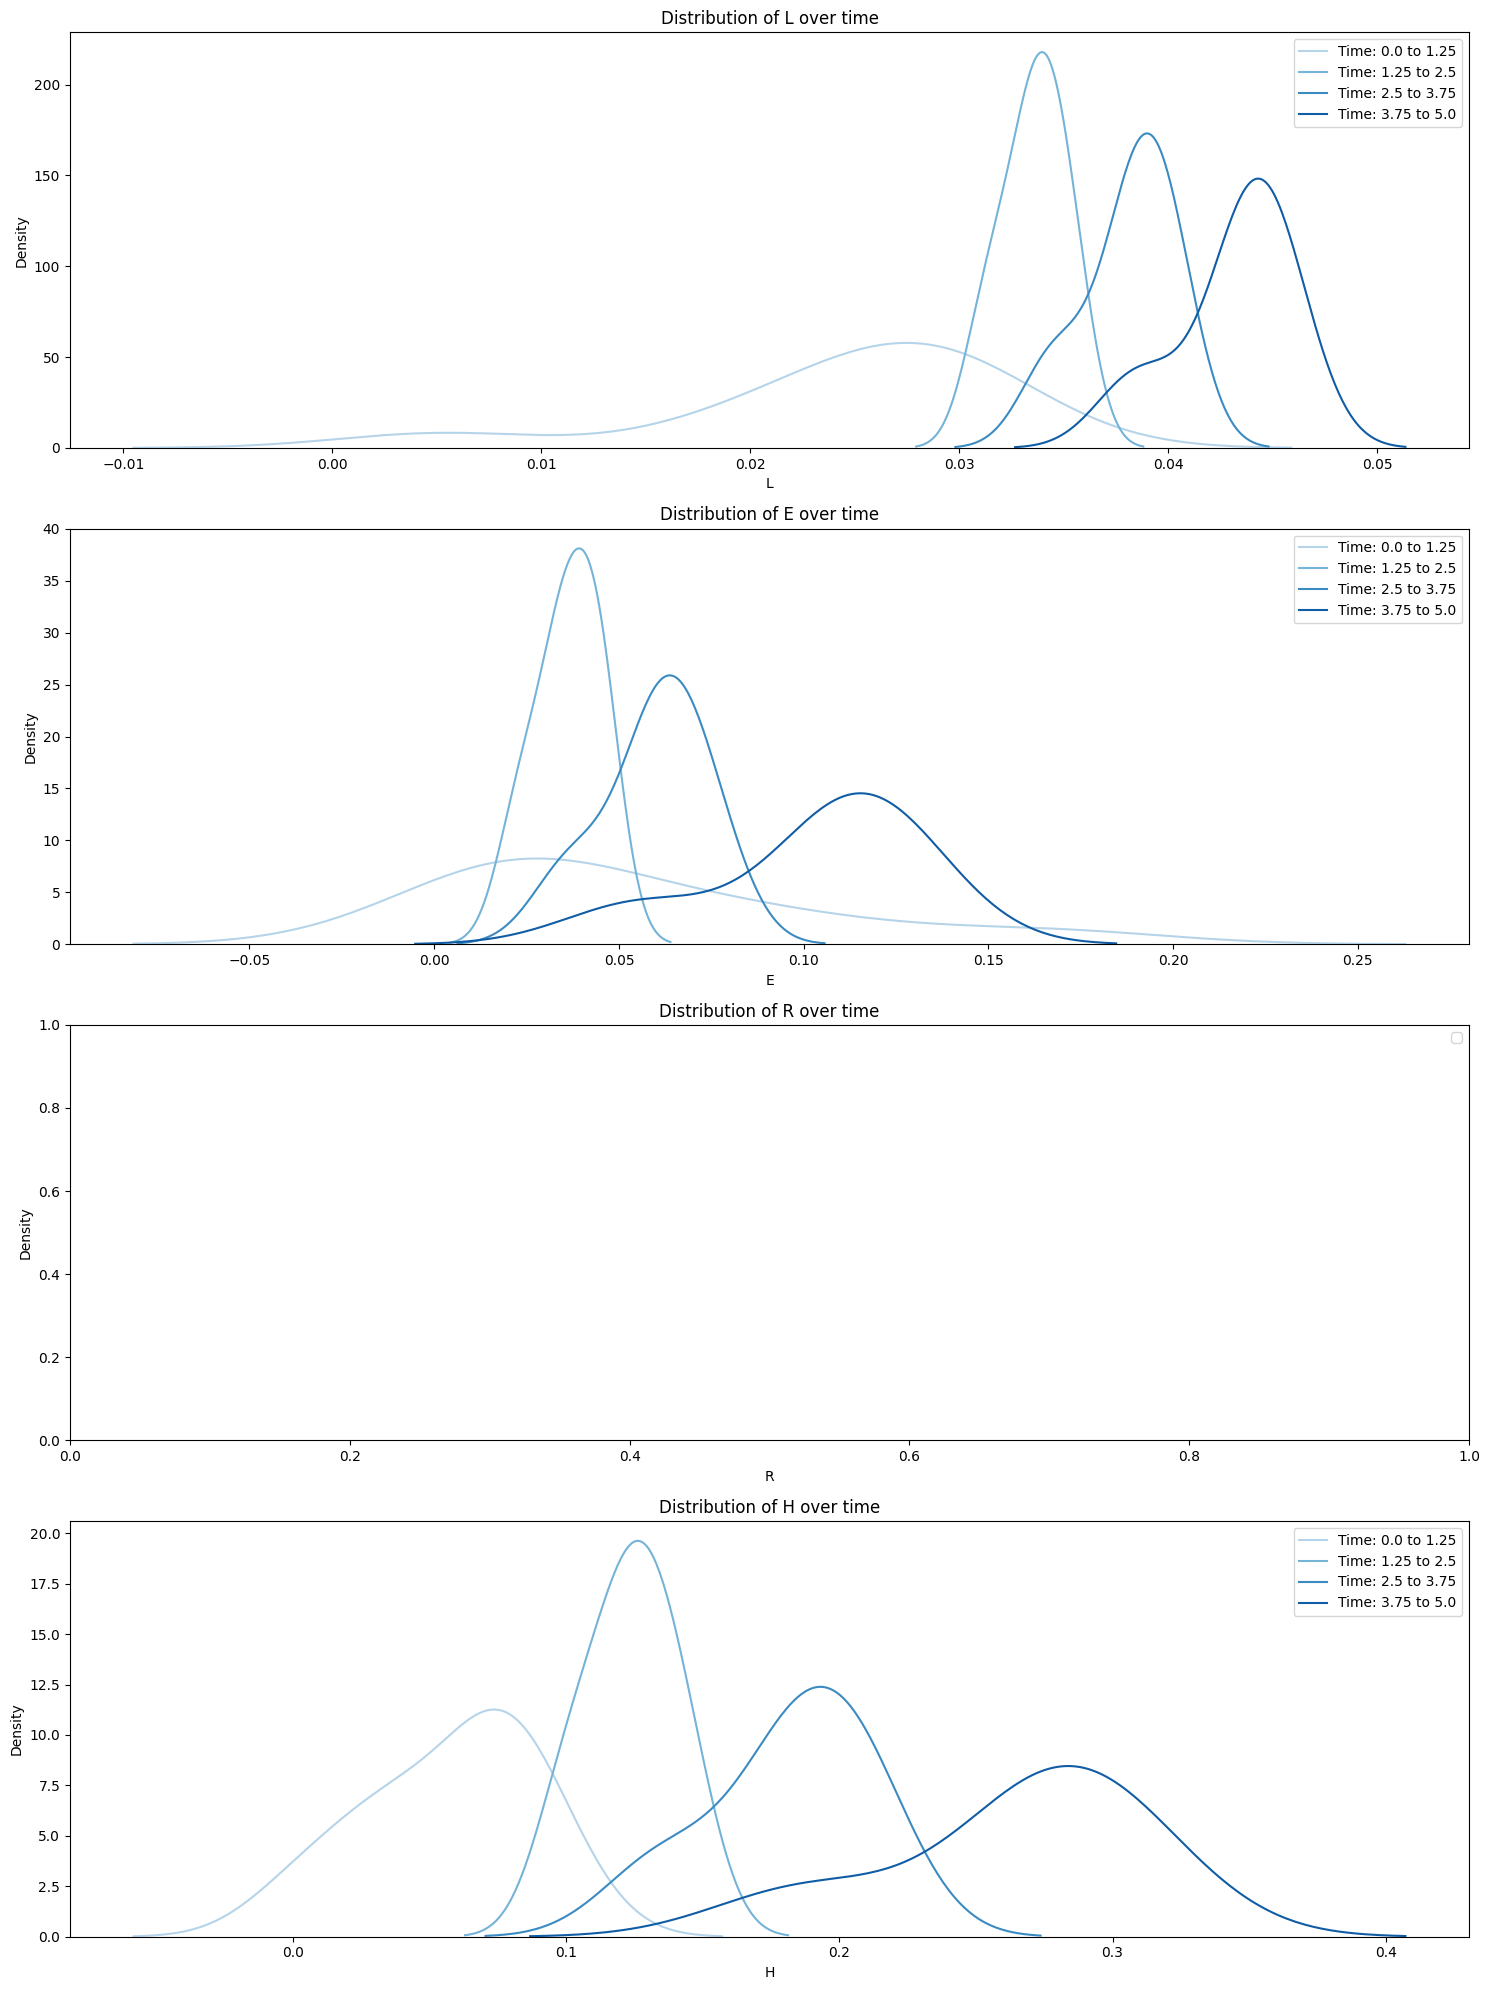

In [25]:
# Define time intervals
time_intervals = np.linspace(df['timestep'].min(), df['timestep'].max(), 5)

# Create a colormap
cmap = cm.get_cmap('Blues', 512)
newcmp = cm.colors.ListedColormap(cmap(np.linspace(0.3, 1, 256)))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 20))

for i in range(len(time_intervals)-1):
    color = newcmp(i / (len(time_intervals) - 1))  # Get a color from the colormap
    mask = (df['timestep'] >= time_intervals[i]) & (df['timestep'] < time_intervals[i+1])
    sns.kdeplot(df.loc[mask, 'L'], ax=ax1, label=f'Time: {time_intervals[i]} to {time_intervals[i+1]}', color=color)
    sns.kdeplot(df.loc[mask, 'E'], ax=ax2, label=f'Time: {time_intervals[i]} to {time_intervals[i+1]}', color=color)
    sns.kdeplot(df.loc[mask, 'R'], ax=ax3, label=f'Time: {time_intervals[i]} to {time_intervals[i+1]}', color=color)
    sns.kdeplot(df.loc[mask, 'H'], ax=ax4, label=f'Time: {time_intervals[i]} to {time_intervals[i+1]}', color=color)

ax1.set_title('Distribution of L over time')
ax2.set_title('Distribution of E over time')
ax3.set_title('Distribution of R over time')
ax4.set_title('Distribution of H over time')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.tight_layout()
plt.show()